In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import io
import pandas as pd

#enter path of the ipynb file before it  
heart = pd.read_csv('/home/mmcoe14/Desktop/03/heart.csv',sep = ',')
data1 = pd.DataFrame(heart)


In [5]:
data1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [6]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


In [7]:
data1.duplicated().sort_values()

0      False
196    False
195    False
194    False
193    False
       ...  
93     False
92     False
107    False
288    False
164     True
Length: 289, dtype: bool

In [8]:
#Check duplicate rows in data
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [9]:
#we have one duplicate row.
#Removing the duplicate row
data1 = data1.drop_duplicates()
duplicate_rows = data1[data1.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 14)


In [10]:
#Looking for null values
print("Null values :: ")
print(data1.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [11]:
data1 = data1.dropna()

In [12]:
#Check if the other data is consistent
data1.shape

(288, 14)

<AxesSubplot:xlabel='age'>

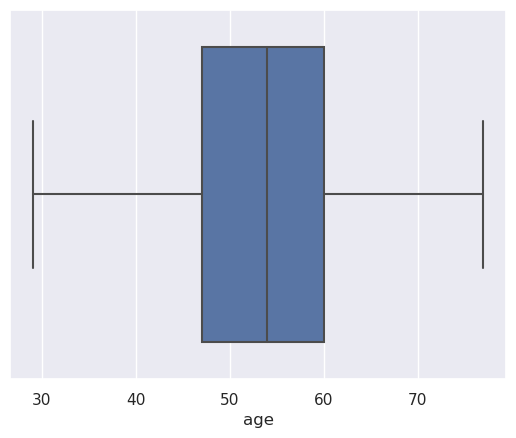

In [13]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=data1['age'])
#No Outliers observed in 'age'288

<AxesSubplot:xlabel='sex'>

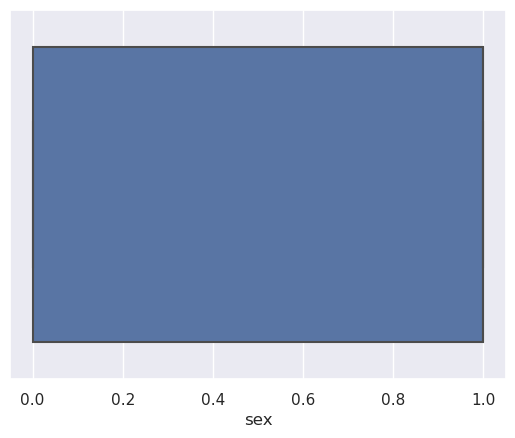

In [14]:
sns.boxplot(x=data1['sex'])
#No outliers observed in sex data

<AxesSubplot:xlabel='cp'>

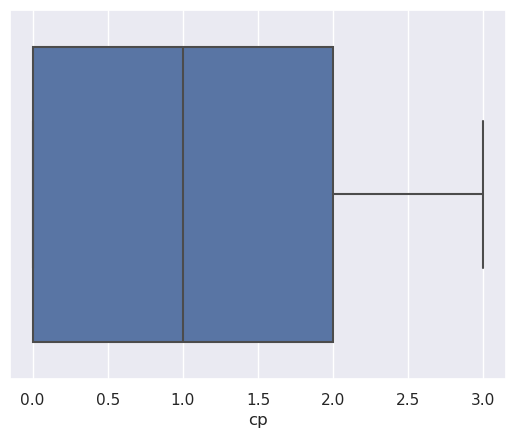

In [15]:
sns.boxplot(x=data1['cp'])
#No outliers in 'cp'

<AxesSubplot:xlabel='trtbps'>

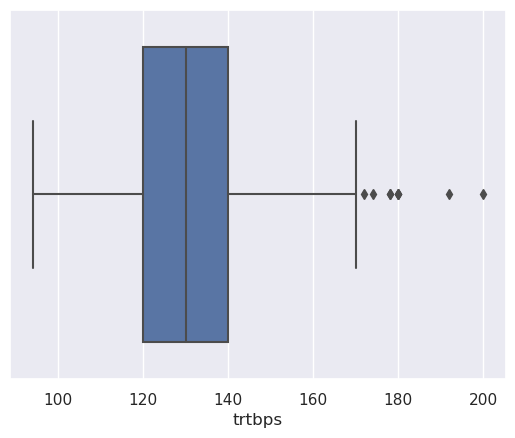

In [16]:
sns.boxplot(x=data1['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later

<AxesSubplot:xlabel='chol'>

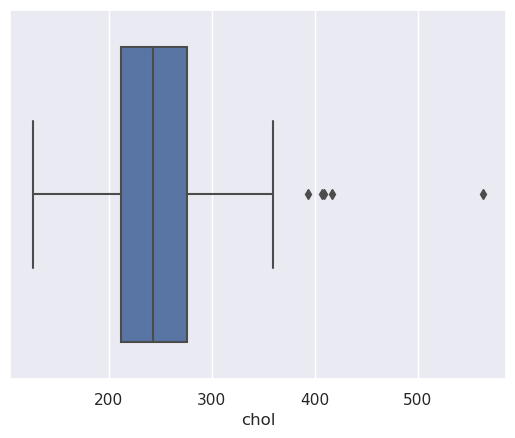

In [17]:
sns.boxplot(x=data1['chol'])
#Some outliers are observed in 'chol'. They will be removed later

<AxesSubplot:xlabel='fbs'>

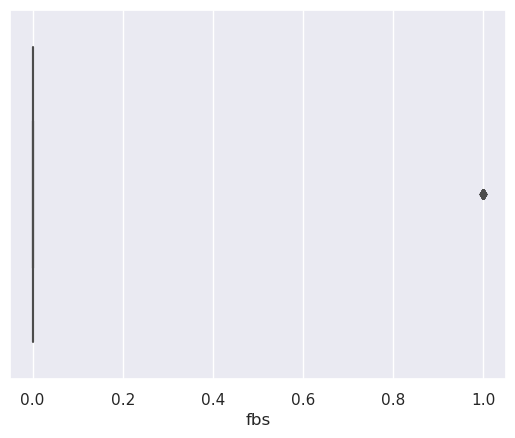

In [18]:
sns.boxplot(x=data1['fbs'])


<AxesSubplot:xlabel='restecg'>

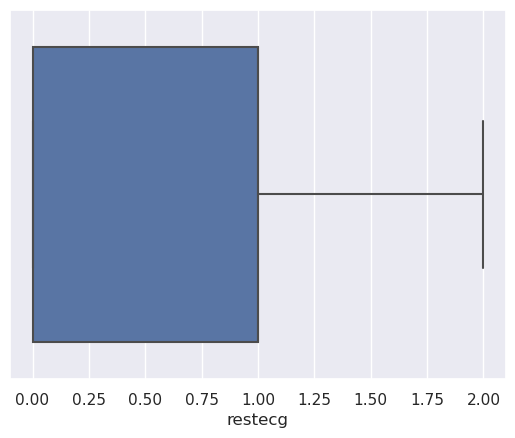

In [19]:
sns.boxplot(x=data1['restecg'])


<AxesSubplot:xlabel='thalachh'>

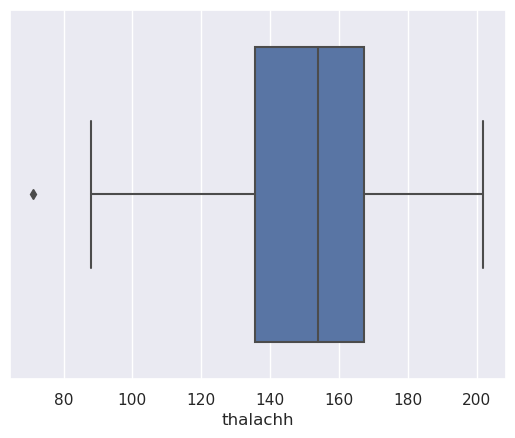

In [20]:
sns.boxplot(x=data1['thalachh'])
#Outliers present in thalachh

<AxesSubplot:xlabel='exng'>

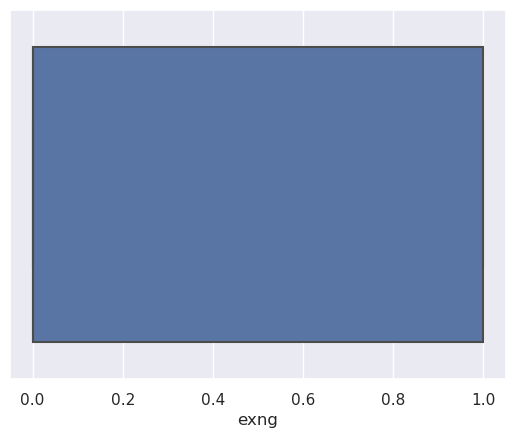

In [21]:
sns.boxplot(x=data1['exng'])


<AxesSubplot:xlabel='oldpeak'>

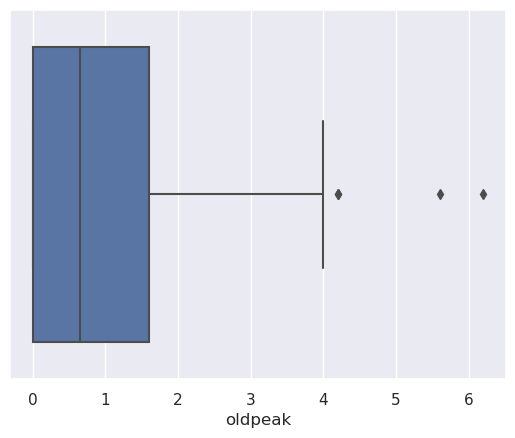

In [22]:
sns.boxplot(x=data1['oldpeak'])
#Outliers are present in 'OldPeak'


<AxesSubplot:xlabel='slp'>

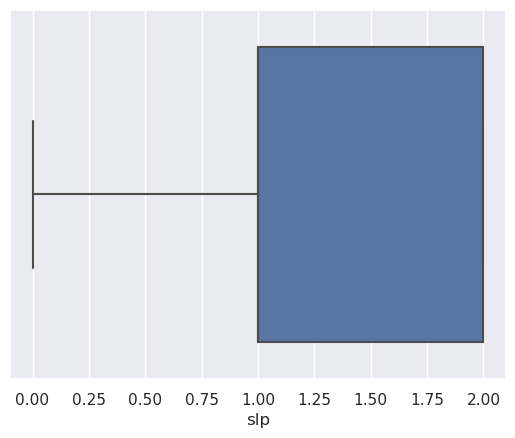

In [23]:
sns.boxplot(x=data1['slp'])


<AxesSubplot:xlabel='caa'>

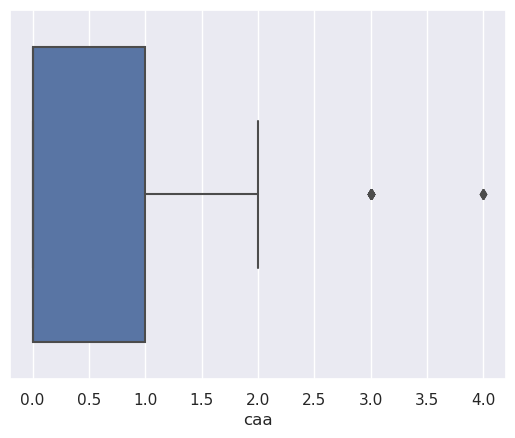

In [24]:
sns.boxplot(x=data1['caa'])
#Outliers are present in 'caa'

<AxesSubplot:xlabel='thall'>

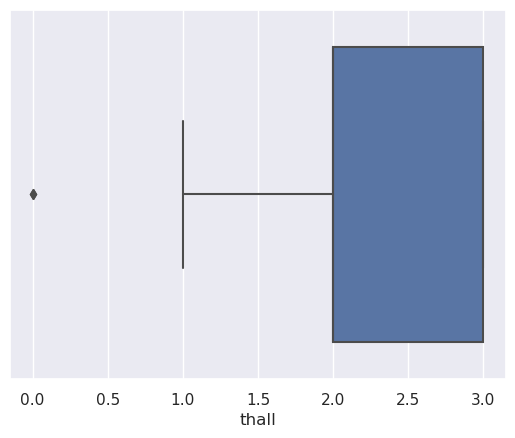

In [25]:
sns.boxplot(x=data1['thall'])


In [26]:
#Find the InterQuartile Range
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        64.25
fbs          0.00
restecg      1.00
thalachh    31.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(218, 14)

In [27]:
#Removing outliers using Z-score
z = np.abs(stats.zscore(data1))
data3 = data1[(z<3).all(axis=1)]
data3.shape

(273, 14)

Text(0.5, 1.0, 'Pearson Correlation')

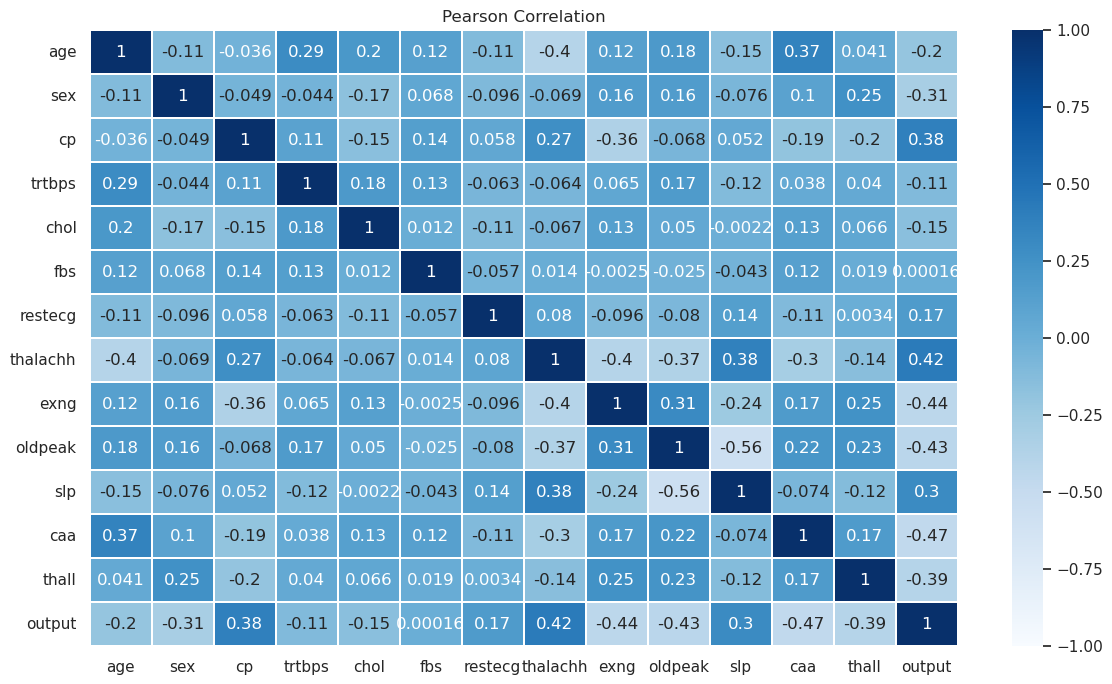

In [28]:
#Finding the correlation between variables
pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

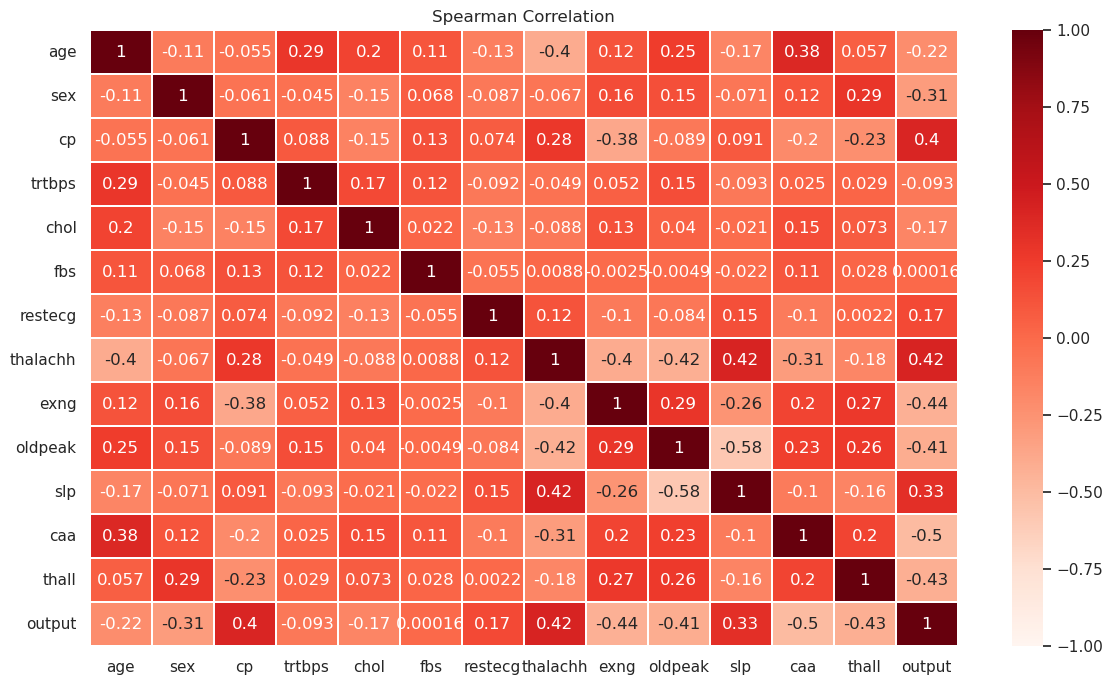

In [29]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Reds", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

# ***Classification***
Before implementing any classification algorithm, we will divide our dataset into training data and test data. I have used 70% of the data for training and the remaining 30% will be used for testing.


In [30]:
#From this we observe that the minimum correlation between output and other features in
#fbs,trtbps and chol
x = data3.drop("output", axis=1)
y = data3["output"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# **1. Logistic Regression Classifier**
The code snippet used to build Logistic Regression Classifier is,

In [31]:
#Building classification models
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trtbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trtbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))

Accuracy of logistic regression classifier ::  0.8658536585365854
nAccuracy of logistic regression classifier after removing features::  0.8780487804878049


# **K Nearest Neighbours Classifier**

Implement K nearest neighbor classifier and print the accuracy of the model.



In [32]:
#K Neighbours Classifier
knc =  KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred_knc = knc.predict(x_test)
print("Accuracy of K-Neighbours classifier :: ", metrics.accuracy_score(y_test,y_pred_knc))

Accuracy of K-Neighbours classifier ::  0.573170731707317


/home/mmcoe14/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# **Random Forest Classifier**
Implement a random forest classifier using the code,



In [33]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.8658536585365854
Feature: Age, Score: 0.08876
Feature: Sex, Score: 0.04960
Feature: cp, Score: 0.08767
Feature: trtbps, Score: 0.07299
Feature: chol, Score: 0.08977
Feature: fbs, Score: 0.00973
Feature: restecg, Score: 0.01732
Feature: thalachh, Score: 0.13029
Feature: exng, Score: 0.05149
Feature: oldpeak, Score: 0.13980
Feature: slp, Score: 0.04176
Feature: caa, Score: 0.10702
Feature: thall, Score: 0.11381
